**Bezier curve** is a parametric curve defined by control points.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(0, 1)

In [3]:
p_0 = np.array([0, 1])
p_1 = np.array([2,3])

In [43]:
# Linear
b_t = lambda t: p_0 + t * (p_1 - p_0)

In [34]:
b = np.apply_along_axis(b_t, 1, t[:, None])

In [41]:
def plot_bezier(control_points, interpolated_points):
    plt.scatter(control_points[:, 0], control_points[:, 1],
                c='red', s=56, marker='+', label='Control Points')
    plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], label="Bezier interpolation")
    plt.legend();

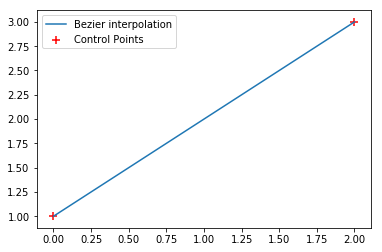

In [42]:
plot_bezier(np.vstack((p_0, p_1)), b)

In [50]:
# Quadratic
b_t2 = lambda t, ps: (1 - t) ** 2 * ps[0, :] + 2 * (1 - t) * t * ps[1, :] + t ** 2 * ps[2, :] 

In [59]:
points = np.array([[0, 1], [1, -3], [2, 3]])
b = np.apply_along_axis(b_t2, 1, t[:, None], points)

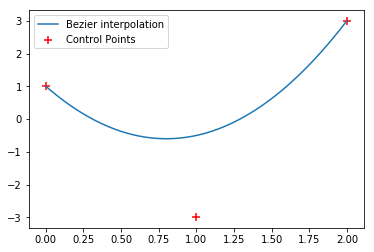

In [60]:
plot_bezier(points, b)

In [62]:
# Cubic
b_t3 = lambda t, ps: (1 - t) ** 3 * ps[0] + 3 * (1 - t) ** 2 * t * ps[1] + 3 * (1 - t) * t ** 2 * ps[2] + t ** 3 * ps[3]

In [64]:
points = np.array([[0, 1], [.75, -3], [1.25, 6], [2, 3]])
b = np.apply_along_axis(b_t3, 1, t[:, None], points)

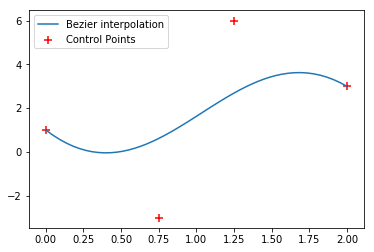

In [65]:
plot_bezier(points, b)

In [154]:
import scipy
import scipy.special

nCr = scipy.special.comb

def bernstein_basis(i, n):
    """ Construct Bernstein basis polynomial given i - current point idx and n - number of points """
    return lambda t: nCr(n, i) * t ** i * (1 - t) ** (n - i)

In [160]:
def bezier_n(points):
    """ Generate bezier curve as a sum of Bernstein polynomials """
    n = points.shape[0]
    return lambda t: np.sum([bernstein_basis(i, n - 1)(t) * points[i] for i in range(len(points))], axis=0)

In [173]:
points = np.array([[0, 1], [.75, -3], [1.25, 6], [2, 3], [4, 4], [4, 6]])

In [174]:
b_n = bezier_n(points)

In [175]:
b = np.apply_along_axis(b_n, 1, t[:, None])

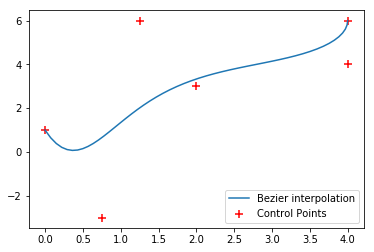

In [176]:
plot_bezier(points, b)

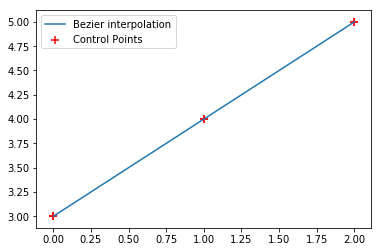

In [183]:
points = np.vstack([np.arange(6), np.arange(6)]).reshape((6, 2), order='F')
b_n = bezier_n(points)
interpolant = np.apply_along_axis(b_n, 1, t[:, None])
plot_bezier(points, interpolant)

In [184]:
points

array([[0, 3],
       [0, 3],
       [1, 4],
       [1, 4],
       [2, 5],
       [2, 5]])